In [1]:
from dmml_project.models.create_model import create_model
from dmml_project.model_selection.load_results import load_results, index_from_model_name
import sklearn.metrics as metrics
from dmml_project.models.model import Model
from dmml_project.models.decision_tree import DecisionTree
from dmml_project.models.random_forest import RandomForest
from dmml_project.models.neural_network import NeuralNetwork
from dmml_project import PROJECT_ROOT, PAPER_IMAGES
from dmml_project.dataset import Dataset
import matplotlib.pyplot as plt
import seaborn as sns
import os

try_to_load = True
training_results = load_results()
model_name = "decision_tree-G0-2"
generation, model_kind, model_index = index_from_model_name(model_name)
best_params = training_results[generation][model_kind][model_index][0]

match model_kind:
    case "decision_tree":
        model_class = DecisionTree
    case "random_forest":
        model_class = RandomForest
    case "neural_network":
        model_class = NeuralNetwork
    case _:
        raise ValueError(f"Unknown model kind: {model_kind}")

train_dataset: Dataset = Dataset.load(f"{PROJECT_ROOT}/data/train.tsv")
test_dataset: Dataset = Dataset.load(f"{PROJECT_ROOT}/data/test.tsv")
model: Model = create_model(kind=model_kind, **best_params)

Skipping random_forest as no search results were found
Skipping neural_network as no search results were found
Skipping decision_tree as no search results were found
Skipping random_forest as no search results were found
Skipping neural_network as no search results were found


In [2]:
history = None
model_path = f"{PROJECT_ROOT}/data/{model_name}.pkl"
can_skip = try_to_load and os.path.exists(model_path)
if can_skip:
    model = model_class.load(model_path)
else:
    history = model.train(train_dataset, valid=test_dataset)
    model.save(f"{PROJECT_ROOT}/data/{model_name}.pkl")
    
    
accuracy, cm = model.evaluate(test_dataset, metric=lambda pred, true: (metrics.accuracy_score(pred,true), metrics.confusion_matrix(pred,true, normalize="true")))

In [3]:
if history is not None:
    train_accuracy, valid_accuracy = history
    plt.plot(train_accuracy, label="train")
    plt.plot(valid_accuracy, label="valid")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

Accuracy: 77.24%


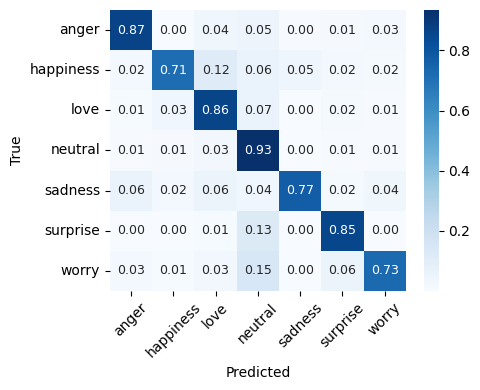

In [5]:
print(f"Accuracy: {accuracy*100:.2f}%")
fig = plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt=".2f", annot_kws={"size": 9}, xticklabels=model.classes(), yticklabels=model.classes())
plt.xlabel("Predicted")
plt.xticks(rotation=45)
plt.ylabel("True")
plt.tight_layout()
plt.savefig(f"{PAPER_IMAGES}/confusion_matrix.png")
plt.show()